In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

In [2]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
# Read in your csv file that has the mid features. 

#data = pd.read_csv('../Feature Extraction/midFeaturesTrainSet.csv')
data_train = pd.read_csv('../Data/Mid_features/df_train_corrLabel.csv')
data_test = pd.read_csv('../Data/Mid_features/df_test_all.csv')
print(data_train.shape)
print(data_test.shape)

(4876, 141)
(1200, 141)


In [4]:
# Check the percentages of the different emotion categories in the training set

data_train.Emotion.value_counts(normalize=True)

NEU    0.178835
ANG    0.164274
DIS    0.164274
FEA    0.164274
HAP    0.164274
SAD    0.164069
Name: Emotion, dtype: float64

In [5]:
# Check the percentages of the different emotion categories in the test set

data_test.Emotion.value_counts(normalize=True)

NEU    0.179167
ANG    0.164167
DIS    0.164167
FEA    0.164167
HAP    0.164167
SAD    0.164167
Name: Emotion, dtype: float64

In [6]:
y_train = data_train[['Emotion']]
y_test  = data_test[['Emotion']]

X_train = data_train.drop(columns  = ['FileID','actorID', 'Emotion', 'SentenceID'])
X_test  = data_test.drop(columns   = ['FileID','actorID', 'Emotion', 'SentenceID'])

In [7]:
y_test

Emotion
0        ANG
1        DIS
2        FEA
3        HAP
4        NEU
...      ...
1195     DIS
1196     FEA
1197     HAP
1198     NEU
1199     SAD

[1200 rows x 1 columns]

In [8]:
## PCA is stored in decomposition
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)
pca.fit(X_train)
pca.explained_variance_ratio_.shape

X_train_transform = pca.transform(X_train)
X_test_transform  = pca.transform(X_test)

print(X_train_transform.shape)
print(X_test_transform.shape)

X_train["comp_1"] = X_train_transform[:,0]
X_train["comp_2"] = X_train_transform[:,1]
X_train["comp_3"] = X_train_transform[:,2]
X_train["comp_4"] = X_train_transform[:,3]
X_train["comp_5"] = X_train_transform[:,4]
X_train["comp_6"] = X_train_transform[:,5]
X_train["comp_7"] = X_train_transform[:,6]
X_train["comp_8"] = X_train_transform[:,7]

X_test["comp_1"] = X_test_transform[:,0]
X_test["comp_2"] = X_test_transform[:,1]
X_test["comp_3"] = X_test_transform[:,2]
X_test["comp_4"] = X_test_transform[:,3]
X_test["comp_5"] = X_test_transform[:,4]
X_test["comp_6"] = X_test_transform[:,5]
X_test["comp_7"] = X_test_transform[:,6]
X_test["comp_8"] = X_test_transform[:,7]

(4876, 9)
(1200, 9)


In [9]:
# Add a column to the y vectors encoding each of the emotions.

y_train_dummies = pd.get_dummies(y_train)
y_train         = pd.concat([y_train, y_train_dummies], axis=1)
y_train["Emotion_ALL"]  = 1*y_train["Emotion_NEU"] + 2*y_train["Emotion_ANG"] + 3*y_train["Emotion_HAP"] + 4*y_train["Emotion_SAD"] + 5*y_train["Emotion_FEA"] + 6*y_train["Emotion_DIS"]
y_train = y_train.drop(columns  = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])

y_test_dummies = pd.get_dummies(y_test)
y_test         = pd.concat([y_test, y_test_dummies], axis=1)
y_test["Emotion_ALL"]  = 1*y_test["Emotion_NEU"] + 2*y_test["Emotion_ANG"] + 3*y_test["Emotion_HAP"] + 4*y_test["Emotion_SAD"] + 5*y_test["Emotion_FEA"] + 6*y_test["Emotion_DIS"]
y_test  = y_test.drop(columns   = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])


In [10]:
X_train_sub = X_train [["comp_1", "comp_2", "comp_3", "comp_4", "comp_5", "comp_6", "comp_7", "comp_8"]]
X_test_sub  = X_test [["comp_1", "comp_2", "comp_3", "comp_4", "comp_5", "comp_6", "comp_7", "comp_8"]]

y_train_sub = y_train
y_test_sub  = y_test

In [11]:
np.unique(y_test)

array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [12]:
# Build pipeline to first scale the mid feature data, then apply the SVC

pipe = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])


# Fit the model to the training data
classifier = pipe.fit(X_train_sub, y_train_sub)

# Get the model's prediction on the test data
pred = pipe.predict(X_test_sub)




/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Look at the confusion matrix for the test data :
cnf_matrix_test = confusion_matrix(y_test_sub, pred)

print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test)
print()

# Look at the confusion matrix for the training data:
pred_train = pipe.predict(X_train_sub)
cnf_matrix_train = confusion_matrix(y_train_sub, pred_train)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train)


confusion matrix for all six emotions of the test set is:
[[187  14   2   5   3   4]
 [ 27  88  33  11   9  29]
 [ 31  24  66  23  25  28]
 [ 44   5  19  73  32  24]
 [ 33  11  33  56  44  20]
 [ 40  14  34  50  16  43]]

confusion matrix for all six emotions of the train set is:
[[776  58   3  18   6  11]
 [110 362 138  72  38  81]
 [ 95  87 287 135  79 118]
 [ 97  10  88 440  66  99]
 [126  63 138 162 260  52]
 [119  70 124 192  55 241]]


In [14]:
from sklearn.metrics import plot_confusion_matrix
class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


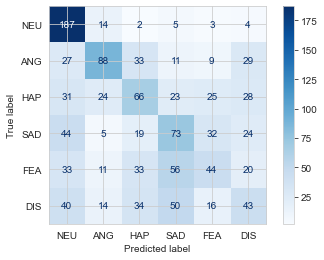

In [15]:
disp = plot_confusion_matrix(classifier, X_test_sub, y_test_sub,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [16]:

FP = cnf_matrix_test.sum(axis=0) - np.diag(cnf_matrix_test) 
FN = cnf_matrix_test.sum(axis=1) - np.diag(cnf_matrix_test)
TP = np.diag(cnf_matrix_test)
TN = cnf_matrix_test.sum() - (FP + FN + TP)

In [17]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [18]:
ACC

array([0.83083333, 0.8525    , 0.79      , 0.77583333, 0.80166667,
       0.78416667])

In [ ]:
TP/sum(cnf_matrix_test)